In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside the notebook
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display the first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Check the number of rows and columns
print("Shape of dataset:", df.shape)

# See data types and missing values
df.info()
# Drop rows with missing values in important columns
df.dropna(subset=['country', 'cast', 'director'], inplace=True)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Check for missing values again
df.isnull().sum()


Shape of dataset: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,4
release_year,0
rating,1
duration,3


<ipython-input-6-b4f438aefb89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


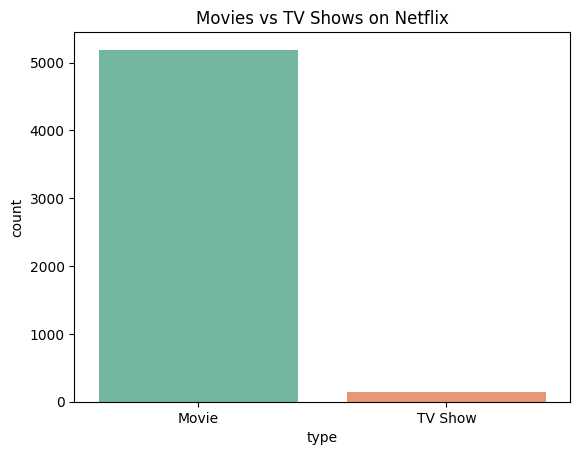

In [6]:
# Count of Movies vs TV Shows
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Movies vs TV Shows on Netflix')
plt.show()


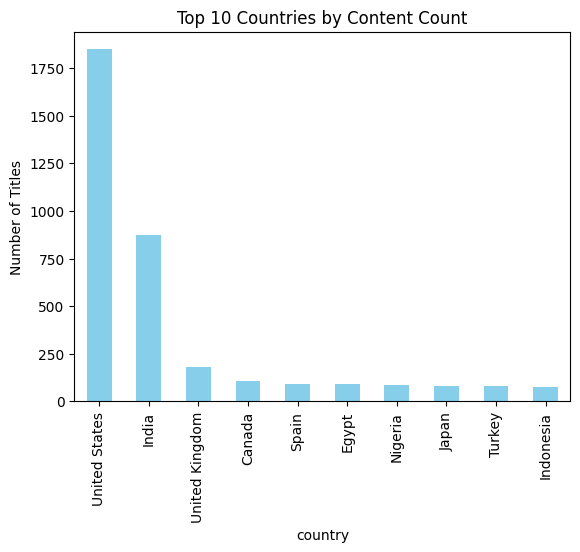

In [7]:
# Top 10 countries with most content
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Content Count')
plt.ylabel('Number of Titles')
plt.show()


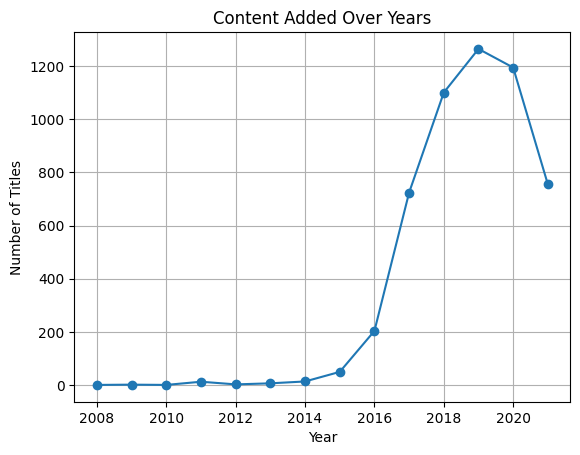

In [8]:
# Count of titles added by year
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


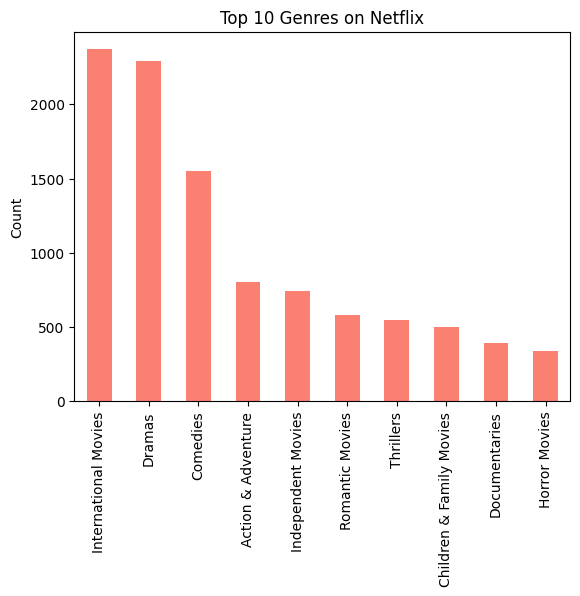

In [9]:
# Split genres and count the top 10
genres = df['listed_in'].str.split(', ')
genre_list = [genre for sublist in genres for genre in sublist]
top_genres = pd.Series(genre_list).value_counts().head(10)

top_genres.plot(kind='bar', color='salmon')
plt.title('Top 10 Genres on Netflix')
plt.ylabel('Count')
plt.show()


In [10]:
!pip install textblob


In [11]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(description):
    return TextBlob(description).sentiment.polarity

# Apply sentiment analysis to the 'description' column
df['sentiment'] = df['description'].apply(get_sentiment)

# Display a sample of the data with sentiment scores
df[['title', 'sentiment']].head()


,title,sentiment
7,Sankofa,-0.083333
8,The Great British Baking Show,0.612500
9,The Starling,0.000000
12,Je Suis Karl,0.150000
24,Jeans,0.500000


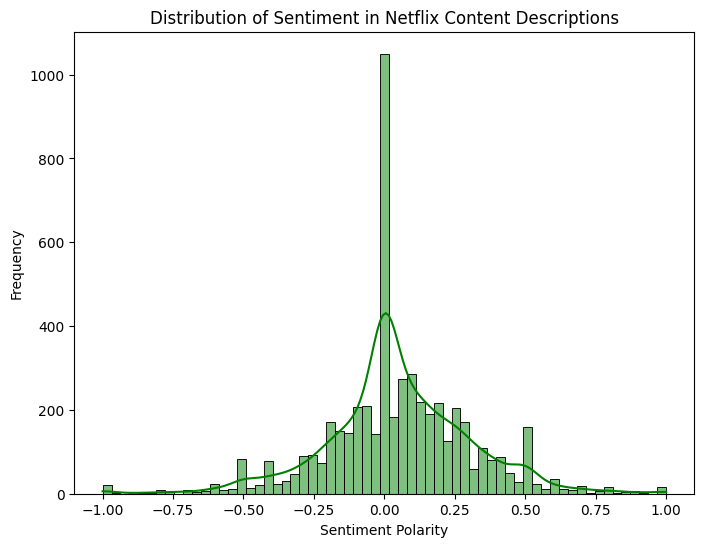

In [12]:
# Plot the distribution of sentiment
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], kde=True, color='green')
plt.title('Distribution of Sentiment in Netflix Content Descriptions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


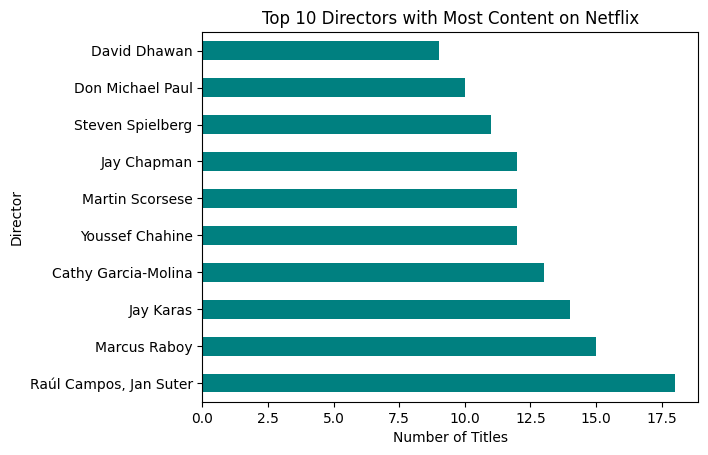

In [13]:
# Get the top 10 directors with the most content
top_directors = df['director'].value_counts().head(10)

# Plot the top 10 directors
top_directors.plot(kind='barh', color='teal')
plt.title('Top 10 Directors with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


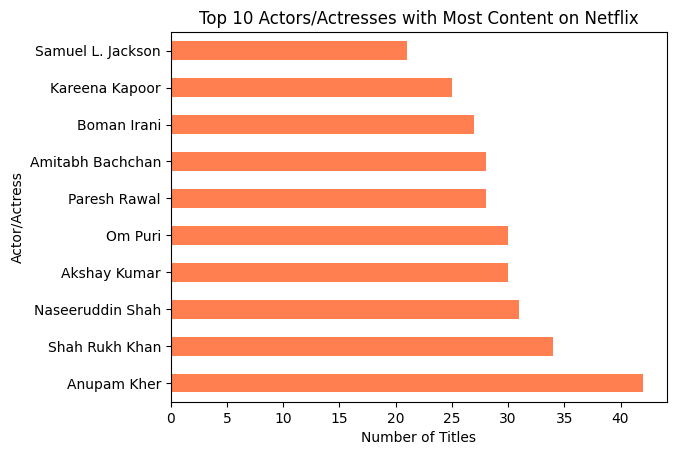

In [14]:
# Get the top 10 cast with the most content
top_cast = df['cast'].str.split(', ').explode().value_counts().head(10)

# Plot the top 10 actors/actresses
top_cast.plot(kind='barh', color='coral')
plt.title('Top 10 Actors/Actresses with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor/Actress')
plt.show()


In [15]:
!pip install plotly


In [16]:
import plotly.express as px

# Create an interactive plot
fig = px.bar(df, x='country', color='type', title='Content Type Distribution by Country')
fig.update_xaxes(tickangle=45)
fig.show()


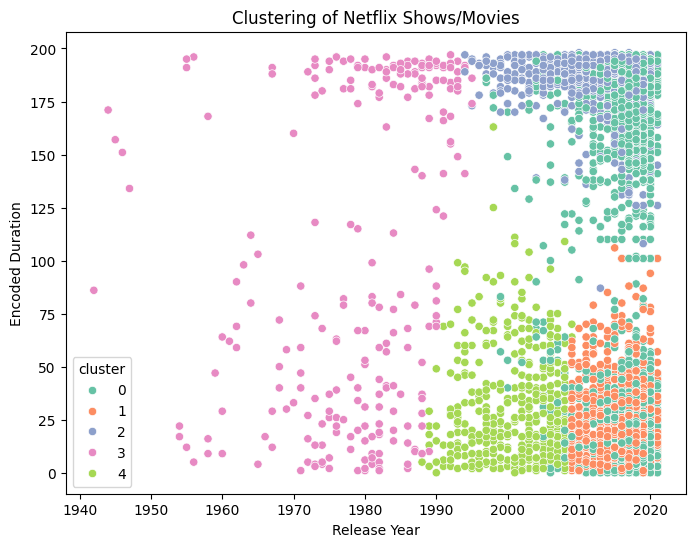

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Encoding categorical columns ('rating' and 'duration') using LabelEncoder
label_encoder = LabelEncoder()
df['rating_encoded'] = label_encoder.fit_transform(df['rating'].fillna('Unknown'))
df['duration_encoded'] = label_encoder.fit_transform(df['duration'].fillna('Unknown'))

# Feature selection for clustering (release year, rating, duration)
X = df[['release_year', 'rating_encoded', 'duration_encoded']].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans Clustering (let's choose 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='release_year', y='duration_encoded', hue='cluster', palette='Set2')
plt.title('Clustering of Netflix Shows/Movies')
plt.xlabel('Release Year')
plt.ylabel('Encoded Duration')
plt.show()


In [18]:
import pandas as pd

# Load the IMDb dataset
df_imdb = pd.read_csv('Netflix TV Shows and Movies.csv')  # Replace with the actual filename

# Inspect the first few rows
print(df_imdb.head())


   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2       

In [23]:
import pandas as pd

# Load original Netflix dataset
df_netflix = pd.read_csv('netflix_titles.csv')

# Load enriched dataset (with IMDb info)
df_imdb = pd.read_csv('Netflix TV Shows and Movies.csv')


In [24]:
# Clean titles and types to match
df_netflix['title_clean'] = df_netflix['title'].str.strip().str.lower()
df_netflix['type_clean'] = df_netflix['type'].str.strip().str.lower()

df_imdb['title_clean'] = df_imdb['title'].str.strip().str.lower()
df_imdb['type_clean'] = df_imdb['type'].str.strip().str.lower()


In [25]:
df_merged = pd.merge(
    df_netflix,
    df_imdb[['title_clean', 'type_clean', 'imdb_score', 'imdb_votes']],
    how='left',
    on=['title_clean', 'type_clean']
)


In [26]:
df_merged[['title', 'type', 'imdb_score', 'imdb_votes']].head()


,title,type,imdb_score,imdb_votes
0,Dick Johnson Is Dead,Movie,7.4,6390.0
1,Blood & Water,TV Show,NaN,NaN
2,Ganglands,TV Show,NaN,NaN
3,Jailbirds New Orleans,TV Show,NaN,NaN
4,Kota Factory,TV Show,NaN,NaN


In [27]:
df_with_imdb = df_merged[df_merged['imdb_score'].notna()]
df_with_imdb[['title', 'type', 'imdb_score', 'imdb_votes']].head()


,title,type,imdb_score,imdb_votes
0,Dick Johnson Is Dead,Movie,7.4,6390.0
6,My Little Pony: A New Generation,Movie,6.8,3468.0
7,Sankofa,Movie,7.0,678.0
9,The Starling,Movie,6.3,11733.0
12,Je Suis Karl,Movie,5.4,889.0


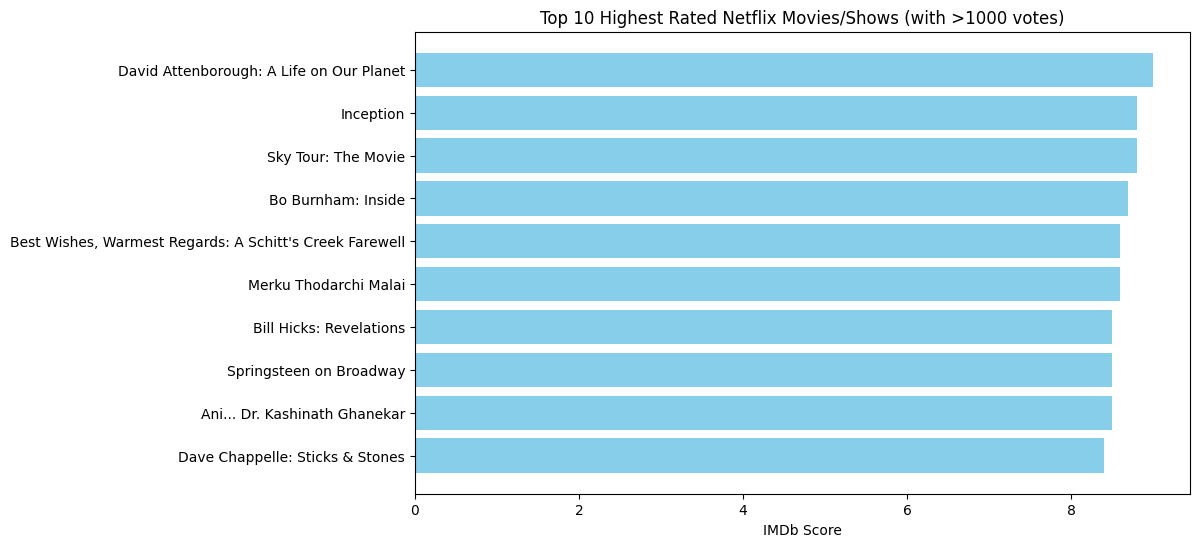

In [28]:
import matplotlib.pyplot as plt

# Filter out rows with missing IMDb data
df_with_imdb = df_merged[df_merged['imdb_score'].notna()]

# Sort by IMDb score and filter by vote count (e.g., only consider movies/shows with at least 1000 votes)
df_top_rated = df_with_imdb[df_with_imdb['imdb_votes'] > 1000].sort_values(by='imdb_score', ascending=False)

# Get the top 10
top_10 = df_top_rated[['title', 'imdb_score', 'imdb_votes']].head(10)

# Plot the top 10
plt.figure(figsize=(10, 6))
plt.barh(top_10['title'], top_10['imdb_score'], color='skyblue')
plt.xlabel('IMDb Score')
plt.title('Top 10 Highest Rated Netflix Movies/Shows (with >1000 votes)')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.show()


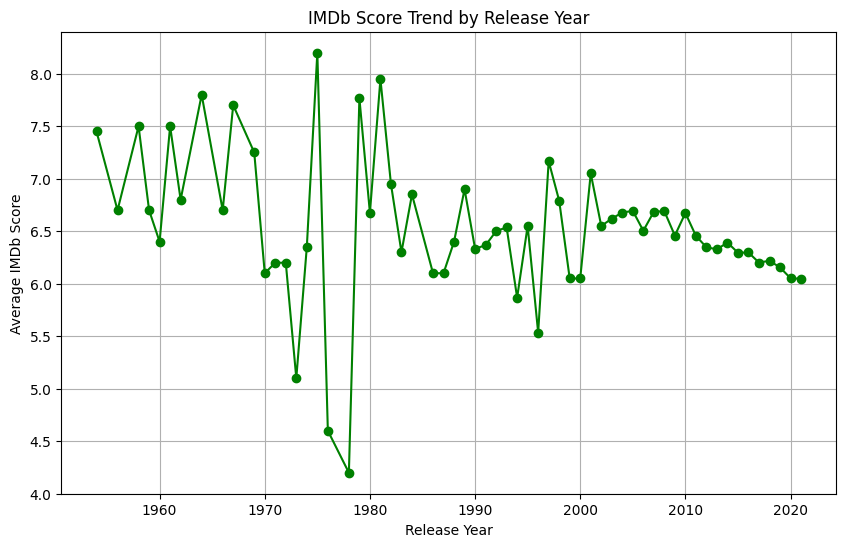

In [29]:
# Group by release year and calculate the average IMDb score
avg_score_by_year = df_with_imdb.groupby('release_year')['imdb_score'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(avg_score_by_year['release_year'], avg_score_by_year['imdb_score'], marker='o', color='green')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.title('IMDb Score Trend by Release Year')
plt.grid(True)
plt.show()


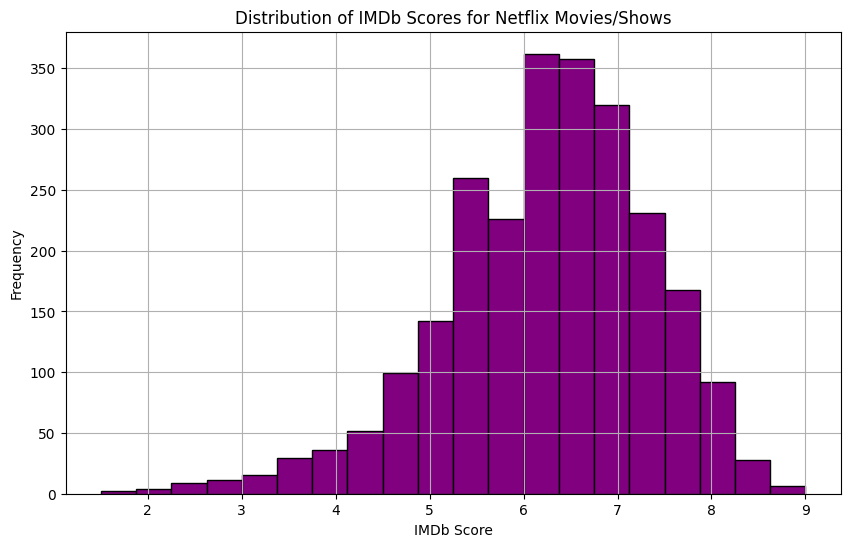

In [30]:
# Plot the distribution of IMDb scores
plt.figure(figsize=(10, 6))
plt.hist(df_with_imdb['imdb_score'], bins=20, color='purple', edgecolor='black')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores for Netflix Movies/Shows')
plt.grid(True)
plt.show()


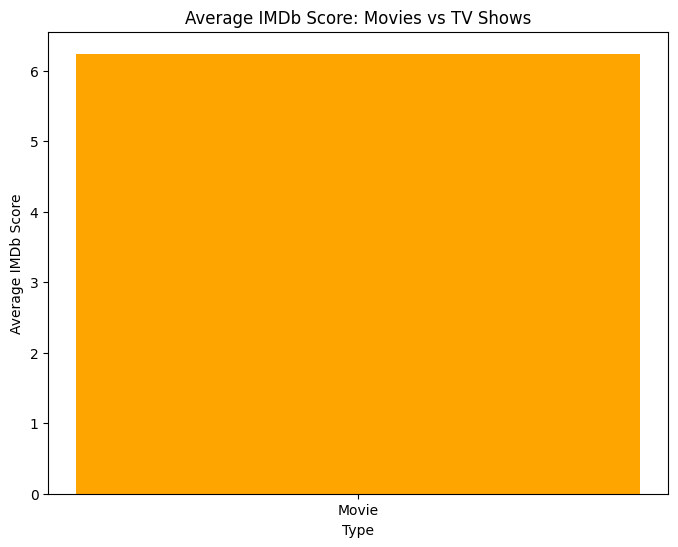

In [31]:
# Group by 'type' (movie vs tv show) and calculate the average IMDb score
avg_score_by_type = df_with_imdb.groupby('type')['imdb_score'].mean().reset_index()

# Plot comparison between Movies and TV Shows
plt.figure(figsize=(8, 6))
plt.bar(avg_score_by_type['type'], avg_score_by_type['imdb_score'], color=['orange', 'lightblue'])
plt.xlabel('Type')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score: Movies vs TV Shows')
plt.show()


In [37]:
import os

# Create the folder if it doesn't exist
os.makedirs('/content/drive/My Drive/Netflix_analysis', exist_ok=True)


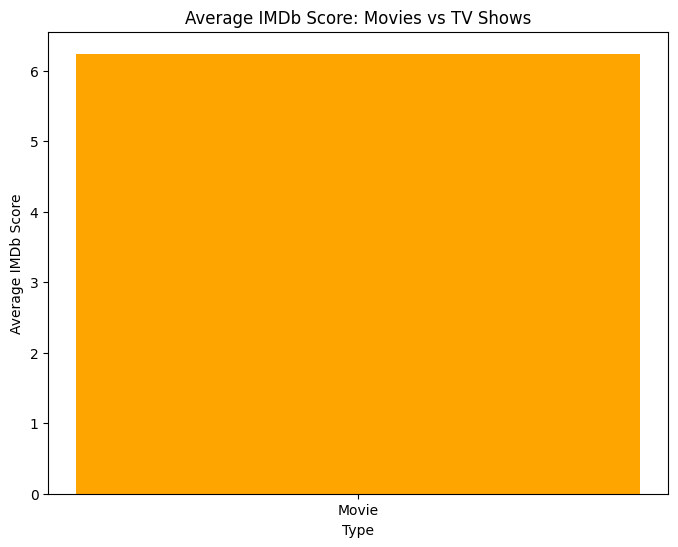

In [38]:
# Save the plot as an image
plt.figure(figsize=(8, 6))
plt.bar(avg_score_by_type['type'], avg_score_by_type['imdb_score'], color=['orange', 'lightblue'])
plt.xlabel('Type')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score: Movies vs TV Shows')

# Save to a specific path in your Google Drive
plt.savefig('/content/drive/My Drive/Netflix_analysis/avg_imdb_score_comparison.png')


In [39]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [40]:
!git branch -m main
